# Adott és következő szezon győzelmi százaléka pontdiagramm és hegedűdiagramm a top 5 bajnokságban 2000 és 2022* között

Programcsomagok importálása

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Lokális adatbázis importálása

In [6]:
df = pd.read_csv('A top 5 bajnokság 2000-2023 közötti adatai.csv')
df2 = df

Szükséges számított mezők elkészítése és kiszámítása

In [7]:
df2 = df2.assign(WPn = lambda x: ((x['W'] / x['MP'])*100).round(0))
df2['WPn+1'] = (df2.apply(lambda x: next((a for (y, z, a) in zip(df2['Season'], df2['Squad'], df2['WPn']) 
                                      if y == (x['Season'] + 1) if z == x['Squad']), None), axis = 1))
df2 = df2.assign(WPnD = lambda x: ((x['WPn+1'] - x['WPn'])))

df2['2Q'] = 0
df2['4Q'] = 0

df2.loc[(df2['WPn'] <= 50) & (df2['WPn+1'] >= 50), '2Q'] = 1
df2.loc[(df2['WPn'] >= 50) & (df2['WPn+1'] <= 50), '4Q'] = 1

Adatbázis szétválasztása országonként

In [8]:
eng_df = df2.loc[df2['League'] == 'Premier-League'].sort_values(by = ['WPnD'], ascending = False).dropna(ignore_index=True)
spa_df = df2.loc[df2['League'] == 'La-Liga'].sort_values(by = ['WPnD'], ascending = False).dropna(ignore_index=True)
ita_df = df2.loc[df2['League'] == 'Serie-A'].sort_values(by = ['WPnD'], ascending = False).dropna(ignore_index=True)
ger_df = df2.loc[df2['League'] == 'Bundesliga'].sort_values(by = ['WPnD'], ascending = False).dropna(ignore_index=True)
fra_df = df2.loc[df2['League'] == 'Ligue-1'].sort_values(by = ['WPnD'], ascending = False).dropna(ignore_index=True)

Pontdiagrammok elkészítése és exportálása

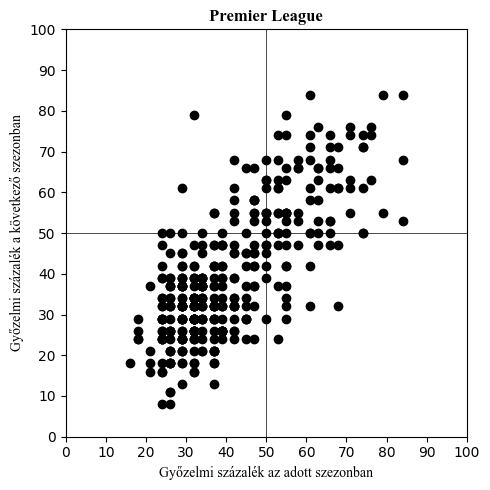

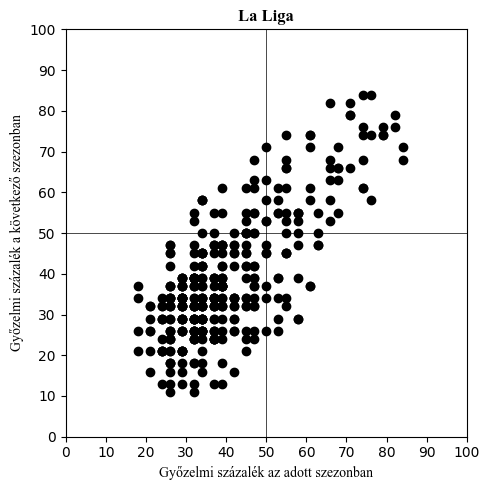

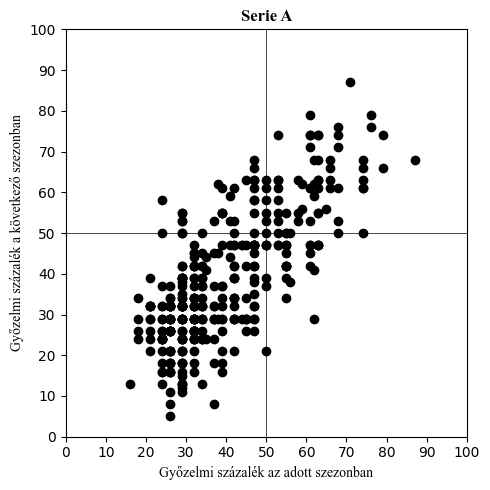

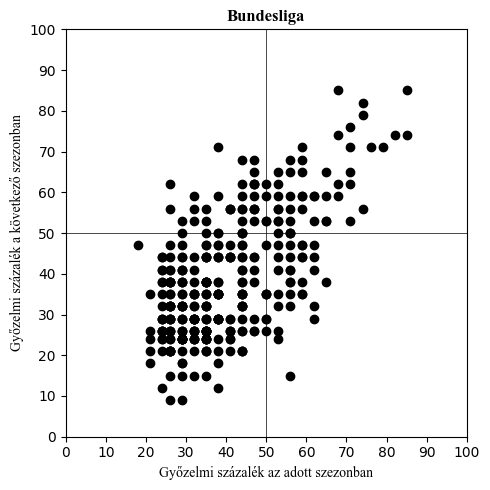

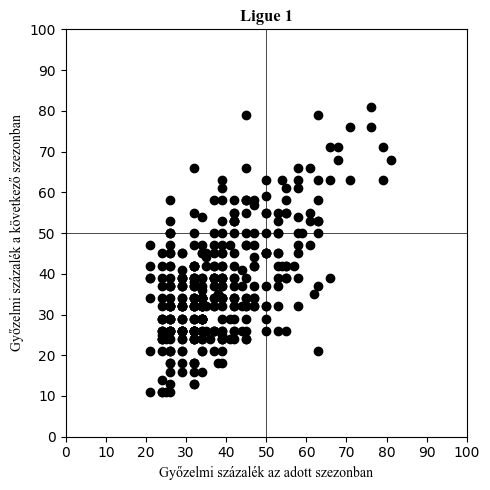

In [9]:
font = {'fontname' : 'Times New Roman'}

fig = plt.figure(figsize = (5,5), linewidth = 1)


plt.hlines(y = 50, xmin = 0, xmax = 100, linewidth = 0.5, color ='black')
plt.vlines(x = 50, ymin = 0, ymax = 100, linewidth = 0.5, color = 'black')
plt.scatter(eng_df['WPn'], eng_df['WPn+1'], color = 'black')

plt.title('Premier League', **font, fontweight = 'bold')
plt.xlabel('Győzelmi százalék az adott szezonban', **font)
plt.ylabel('Győzelmi százalék a következő szezonban', **font)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))



plt.savefig("pics/eng_kadish.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

plt.hlines(y = 50, xmin = 0, xmax = 100, linewidth = 0.5, color ='black')
plt.vlines(x = 50, ymin = 0, ymax = 100, linewidth = 0.5, color = 'black')
plt.scatter(spa_df['WPn'], spa_df['WPn+1'], color = 'black')

plt.title('La Liga', **font, fontweight = 'bold')
plt.xlabel('Győzelmi százalék az adott szezonban', **font)
plt.ylabel('Győzelmi százalék a következő szezonban', **font)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.tight_layout()

plt.savefig("pics/spa_kadish.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

plt.hlines(y = 50, xmin = 0, xmax = 100, linewidth = 0.5, color ='black')
plt.vlines(x = 50, ymin = 0, ymax = 100, linewidth = 0.5, color = 'black')
plt.scatter(ita_df['WPn'], ita_df['WPn+1'], color = 'black')

plt.title('Serie A', **font, fontweight = 'bold')
plt.xlabel('Győzelmi százalék az adott szezonban', **font)
plt.ylabel('Győzelmi százalék a következő szezonban', **font)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.tight_layout()

plt.savefig("pics/ita_kadish.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

plt.hlines(y = 50, xmin = 0, xmax = 100, linewidth = 0.5, color ='black')
plt.vlines(x = 50, ymin = 0, ymax = 100, linewidth = 0.5, color = 'black')
plt.scatter(ger_df['WPn'], ger_df['WPn+1'], color = 'black')

plt.title('Bundesliga', **font, fontweight = 'bold')
plt.xlabel('Győzelmi százalék az adott szezonban', **font)
plt.ylabel('Győzelmi százalék a következő szezonban', **font)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.tight_layout()

plt.savefig("pics/ger_kadish.png")


fig = plt.figure(figsize = (5,5), linewidth = 1)

plt.hlines(y = 50, xmin = 0, xmax = 100, linewidth = 0.5, color ='black')
plt.vlines(x = 50, ymin = 0, ymax = 100, linewidth = 0.5, color = 'black')
plt.scatter(fra_df['WPn'], fra_df['WPn+1'], color = 'black')

plt.title('Ligue 1', **font, fontweight = 'bold')
plt.xlabel('Győzelmi százalék az adott szezonban', **font)
plt.ylabel('Győzelmi százalék a következő szezonban', **font)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.tight_layout()

plt.savefig("pics/fra_kadish.png")

Szükséges számítások elvégzése

In [16]:
eng_df['2Q'] = 0
eng_df['4Q'] = 0

eng_df.loc[(eng_df['WPn'] <= 50) & (eng_df['WPn+1'] >= 50), '2Q'] = 1
eng_df.loc[(eng_df['WPn'] >= 50) & (eng_df['WPn+1'] <= 50), '4Q'] = 1

In [34]:
eng2Q = eng_df['2Q'].sum()
eng4Q = eng_df['4Q'].sum()
engAvg = eng_df['WPnD'].mean()
engTotal = eng2Q + eng4Q
engMax = eng_df['WPnD'].max()
engMin = eng_df['WPnD'].min()
engCount = eng_df['MP'].count()
engPCT = engTotal / engCount

ita2Q = ita_df['2Q'].sum()
ita4Q = ita_df['4Q'].sum()
itaAvg = ita_df['WPnD'].mean()
itaTotal = ita2Q + ita4Q
itaMax = ita_df['WPnD'].max()
itaMin = ita_df['WPnD'].min()
itaCount = ita_df['MP'].count()
itaPCT = itaTotal / itaCount

spa2Q = spa_df['2Q'].sum()
spa4Q = spa_df['4Q'].sum()
spaAvg = spa_df['WPnD'].mean()
spaTotal = spa2Q + spa4Q
spaMax = spa_df['WPnD'].max()
spaMin = spa_df['WPnD'].min()
spaCount = spa_df['MP'].count()
spaPCT = spaTotal / spaCount

ger2Q = ger_df['2Q'].sum()
ger4Q = ger_df['4Q'].sum()
gerAvg = ger_df['WPnD'].mean()
gerTotal = ger2Q + ger4Q
gerMax = ger_df['WPnD'].max()
gerMin = ger_df['WPnD'].min()
gerCount = ger_df['MP'].count()
gerPCT = gerTotal / gerCount

fra2Q = fra_df['2Q'].sum()
fra4Q = fra_df['4Q'].sum()
fraAvg = fra_df['WPnD'].mean()
fraTotal = fra2Q + fra4Q
fraMax = fra_df['WPnD'].max()
fraMin = fra_df['WPnD'].min()
fraCount = fra_df['MP'].count()
fraPCT = fraTotal / fraCount

In [35]:
print(engTotal, itaTotal, spaTotal, gerTotal, fraTotal)

66 70 57 80 77


In [38]:
print(engCount, itaCount, spaCount, gerCount, fraCount)

374 362 374 341 375


In [36]:
print(engPCT, itaPCT, spaPCT, gerPCT, fraPCT)

0.17647058823529413 0.19337016574585636 0.15240641711229946 0.23460410557184752 0.20533333333333334


In [20]:
print(engAvg, itaAvg, spaAvg, gerAvg, fraAvg)

-1.1711229946524064 -1.0662983425414365 -1.3021390374331552 -1.3724340175953078 -1.0293333333333334


In [21]:
print(engMax, itaMax, spaMax, gerMax, fraMax)

47.0 34.0 24.0 36.0 34.0


In [22]:
print(engMin, itaMin, spaMin, gerMin, fraMin)

-36.0 -33.0 -29.0 -41.0 -42.0


In [23]:
eng_df_pos = eng_df[eng_df['WPnD'] > 0]
eng_df_neg = eng_df[eng_df['WPnD'] < 0]
eng_df_pos.dropna()
eng_df_neg.dropna()

engAvg_pos = eng_df_pos['WPnD'].mean()
engAvg_neg = eng_df_neg['WPnD'].mean()

fra_df_pos = fra_df[fra_df['WPnD'] > 0]
fra_df_neg = fra_df[fra_df['WPnD'] < 0]
fra_df_pos.dropna()
fra_df_neg.dropna()

fraAvg_pos = fra_df_pos['WPnD'].mean()
fraAvg_neg = fra_df_neg['WPnD'].mean()

In [24]:
print(engAvg_pos, engAvg_neg, fraAvg_pos, fraAvg_neg)

9.28 -9.945652173913043 9.814569536423841 -10.152173913043478


Hegedűdiagramm elkészítése és exportálása

In [25]:
violin_df = df2

C:\Users\Leon\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leon\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


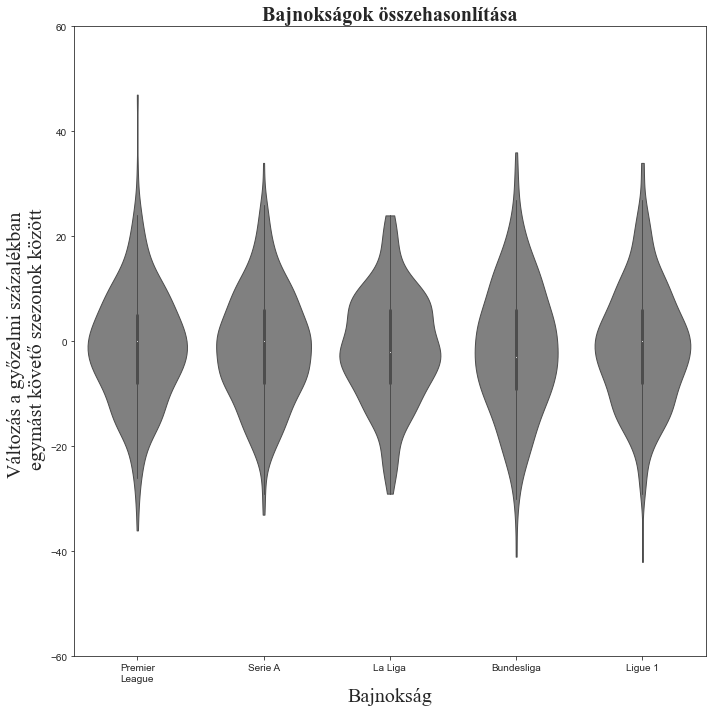

In [82]:
fig = plt.figure(figsize = (10,10), linewidth = 1)

#sns.set_style("ticks", {'axes.grid' : False})


v = sns.violinplot(x = violin_df['League'], y = violin_df['WPnD'], data = violin_df,
                   legend = False, linecolor = 'black', linewidth = 1,
                   order = ['Premier-League', 'Serie-A', 'La-Liga', 'Bundesliga', 'Ligue-1'], color = 'grey', cut = 0)

v.set(xticklabels = []) 

plt.title('Bajnokságok összehasonlítása', **font, fontweight = 'bold', size = 20)
plt.xlabel('Bajnokság', **font, size = 16)
plt.ylabel('Változás a győzelmi százalékban \n egymást követő szezonok között', **font, size = 16)

xlabels = ['Premier\nLeague', 'Serie A', 'La Liga', 'Bundesliga', 'Ligue 1']
v.set_xticklabels(xlabels)

plt.ylim(-60, 60)
plt.tight_layout()


plt.savefig("kadish_violin.png")